In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the dataset
df = pd.read_csv('/content/Housing.csv')

In [5]:
# Data preprocessing
# Convert categorical variables to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                   'airconditioning', 'prefarea', 'furnishingstatus']

In [6]:
# Label encoding for binary categorical variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [7]:
# One-hot encoding for furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [8]:
# Feature selection and target
X = df.drop('price', axis=1)
y = df['price']

In [9]:
# Split data into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Initialize and train the model
multi_reg = LinearRegression()
multi_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_multi = multi_reg.predict(X_test_scaled)

In [14]:
# Evaluate model
print("Multiple Regression Coefficients:")
for feature, coef in zip(X.columns, multi_reg.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {multi_reg.intercept_:.4f}")

print("\nEvaluation Metrics (Multiple Regression):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_multi):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_multi):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_multi)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_multi):.4f}")


Multiple Regression Coefficients:
area: 519552.4163
bedrooms: 57349.5594
bathrooms: 521879.0277
stories: 349251.4389
mainroad: 128498.6282
guestroom: 88768.6677
basement: 187067.8032
hotwaterheating: 149862.7030
airconditioning: 365157.3939
parking: 192005.9537
prefarea: 266656.3520
furnishingstatus_semi-furnished: -62837.3219
furnishingstatus_unfurnished: -192015.9180
Intercept: 4706527.3853

Evaluation Metrics (Multiple Regression):
MAE: 970043.4039
MSE: 1754318687330.6680
RMSE: 1324506.9601
R²: 0.6529


In [15]:
# 2. Simple Linear Regression (using just 'area' feature)
print("\nSimple Linear Regression (using area):")
X_simple = df[['area']]
y_simple = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

simple_reg = LinearRegression()
simple_reg.fit(X_train_s, y_train_s)

y_pred_simple = simple_reg.predict(X_test_s)
print("Simple Regression Coefficients:")
print(f"area: {simple_reg.coef_[0]:.4f}")
print(f"Intercept: {simple_reg.intercept_:.4f}")

print("\nEvaluation Metrics (Simple Regression):")
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_simple):.4f}")
print(f"MSE: {mean_squared_error(y_test_s, y_pred_simple):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_s, y_pred_simple)):.4f}")
print(f"R²: {r2_score(y_test_s, y_pred_simple):.4f}")


Simple Linear Regression (using area):
Simple Regression Coefficients:
area: 425.7298
Intercept: 2512254.2640

Evaluation Metrics (Simple Regression):
MAE: 1474748.1338
MSE: 3675286604768.1851
RMSE: 1917103.7021
R²: 0.2729


In [16]:
# Visualization
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

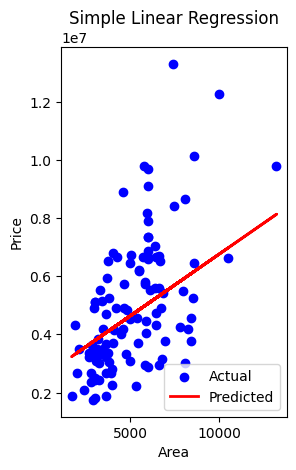

In [17]:
# Simple Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()

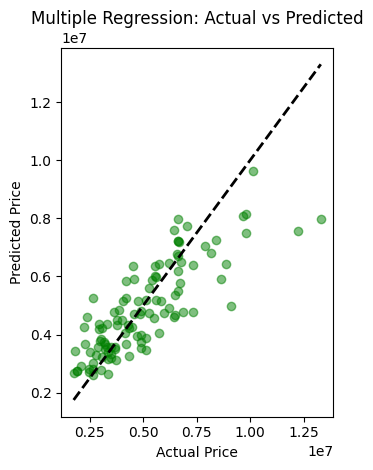

In [18]:
# Multiple Regression - Actual vs Predicted plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multi, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()


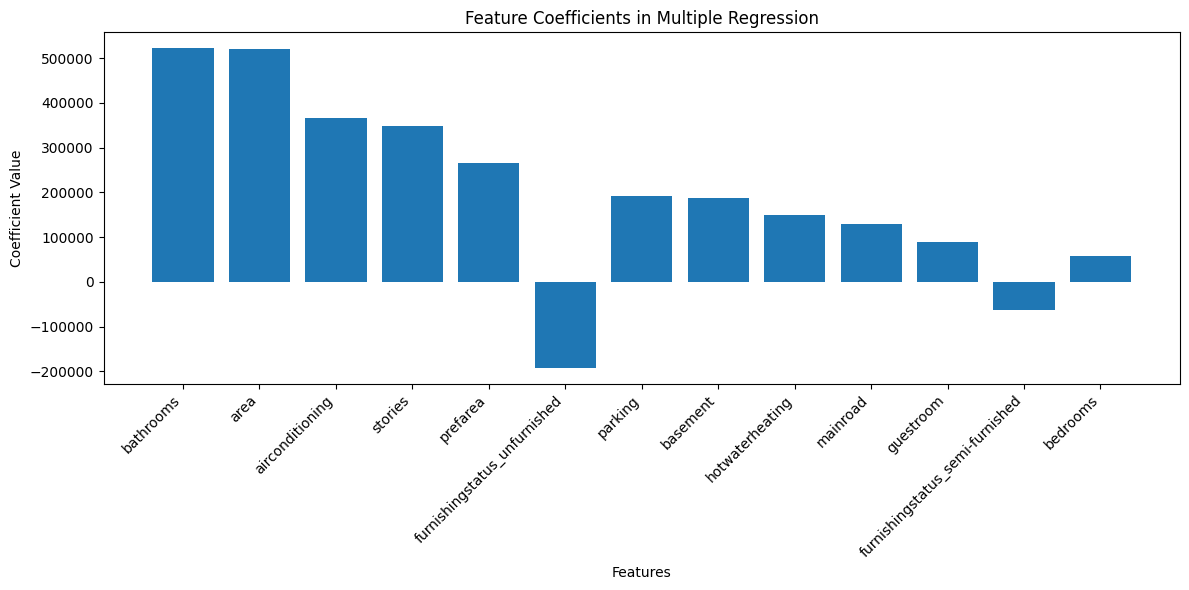

In [19]:
# Coefficient plot for multiple regression
plt.figure(figsize=(12, 6))
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': multi_reg.coef_})
coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients in Multiple Regression')
plt.tight_layout()
plt.show()